<a href="https://colab.research.google.com/github/ljs7463/AnalysisProject/blob/master/%EA%B0%9C%EC%9D%B8%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8/1.%20Customer%20Churn/Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install matplotlib -U
# import matplotlib as plt
# plt.__version__

# Telco Customer Churn 고객 유지를 위한 이탈 고객 분석및 해결방안 탐색(나아가 예측모델 만들기)
(Telco Custome Churn EDA)

데이터 선정이유 : 모든회사들은 고객을 가지고 있다. 또한 이런고객들을 새로 유입하는것도 중요하지만, 이미 들어온 고객들을 유지하고 함께 성장하는것또한 매우 중요하다. 이를위해 이탈하는 고객들의 특징을 분석하여, 어떻게 해결할 수 있을지 숨겨진 데이터를 찾으며, 분석해보고 해결해 보고자 한다.

[ 컬 럼 소 개 ]

---

[고객정보]

customerID : 고객 id

gender : 성별

SeniorCitizen : 고령자(yes:1, no:0)

Partner : 파트너

Dependents : 부양 가족

tenure : 보유 개월 수(고객이 머물렀던 개월 수)

---

[서비스]

PhoneService : 휴대폰 서비스

MultipleLines : 여러회선 여부( 예, 아니오, 전화 서비스 없음)

InternetService : 인터넷 서비스(인터넷 서비스 제공없체: DSL, 광섬유, 아니요)

OnlineSecurity : 온라인 보안 여부(예, 아니오, 전화서비스 없음)

OnlineBackup : 온라인 백업 여부(예, 아니오, 전화서비스 없음)

DeviceProtection : 장치보호 여부(예, 아니요, 인터넷 서비스 없음)

TechSupport : 기술지원 여부(예, 아니요, 인터넷 서비스 없음)

StreamingTV : StreamingTV보유 여부(예, 아니요, 인터넷 서비스 없음)

StreamingMovies : 스트리밍 영화 보유 여부(예, 아니요, 인터넷 서비스 없음)

---
[계약 및 요금]

Contract : 계약(계약기간 월간, 1년, 2년)

PaperlessBilling : 종이없는 결제(예, 아니요)

PaymentMethod : 고객의 결제 수단 (전자 수표, 우편 수표, 은행 송금 (자동), 신용 카드 (자동))

MonthlyCharges : 월간 요금

TotalCharges : 총 요금

---

Churn : 지난달 퇴사한 고객

In [2]:
# 필요한 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


In [3]:
# 데이터 불러오기 
data = pd.read_csv('/content/Raw_data.csv')

# 데이터 확인 및 EDA

In [4]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

결측값이 없고, 7043개의 데이터가 존재한다.

데이터 타입 일부 변경(결측값은 나중에 다루기로 한다.)

In [7]:
# object타입을 numeric타입으로 변경
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'].replace(' ',''))
data['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [8]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


고객아이디는 현재 분석에 있어 중요하지 않으므로 제거해 준다.

In [9]:
data = data.iloc[:,1:]
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


## Numeric데이터를 활용한 이탈고객 특징 확인

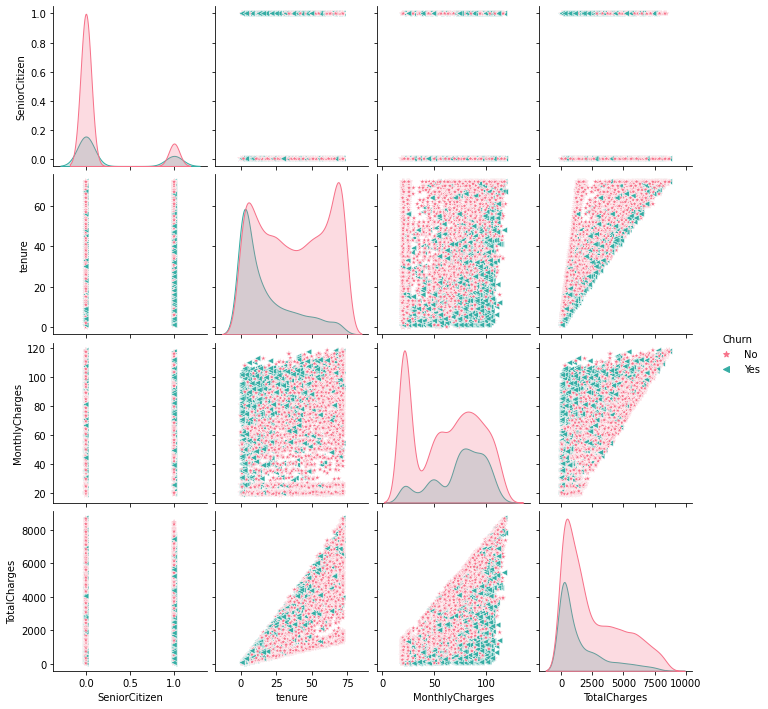

In [10]:
# 현재 numerical데이터의 관계 보기
sns.pairplot(data, hue = 'Churn', palette='husl', markers = ['*', "<"]);

1. 고령인 고객일수록 이탈할 확률이 높다.
2. 가입기간이 짧고 요금이 높은곳에 이탈고객들이 상대적으로 집중되어 있다.
3. 가입기간이 짧고 총 요금이 높을 수록 상대적으로 이탈을 많이한다, 
4. 총 요금이 올라가는것 보다 매달 지불하는 비용이 높을수록 이탈 고객이 훨씬더 많다.

## **가설1)** 단기계약(약정)일수록 이탈할 가능성이 높지 않을까?

In [11]:
pd.crosstab(data['Contract'], data['Churn'])

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


In [12]:
data_test1 = data[data['Churn']=='Yes']
data_test1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


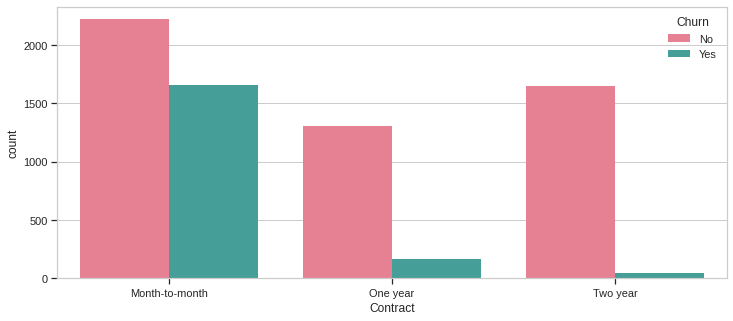

In [13]:
# 시각화
plt.figure(figsize= (12, 5))
plt.style.use('seaborn-whitegrid') # setting "테마"(matplot으로)
#sns.set_style('darkgrid') seaborn 으로 setting
sns.set_context('notebook')


# countplot 시각화
sns.countplot(data['Contract'], hue = data['Churn'],palette='husl')

In [14]:
# 인코딩 
Contract_map = {'Month-to-month' : 0, 'One year' : 1, 'Two year' : 2}
data['Contract'] = data['Contract'].map(Contract_map)
data['Contract'].unique()

array([0, 1, 2])

월별 계약일수록 이탈가능성이 높으며 장기계약인 2년계약시 가장 이탈율이 낮다

- 인사이트 :  **통신사를 이동했을때 최소 1년, 가능하다면 2년약정을 하는것이 고객유지에 가장좋으며, 이탈을 방지할 수 있다.**

## 가설2) 오래 유지한 고객일 수록 이탈이 적지 않을까?

In [15]:
print(" 가장 짧은 기간 :", data['tenure'].min())
print(" 가장 오랜 기간 :", data['tenure'].max())

 가장 짧은 기간 : 0
 가장 오랜 기간 : 72


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


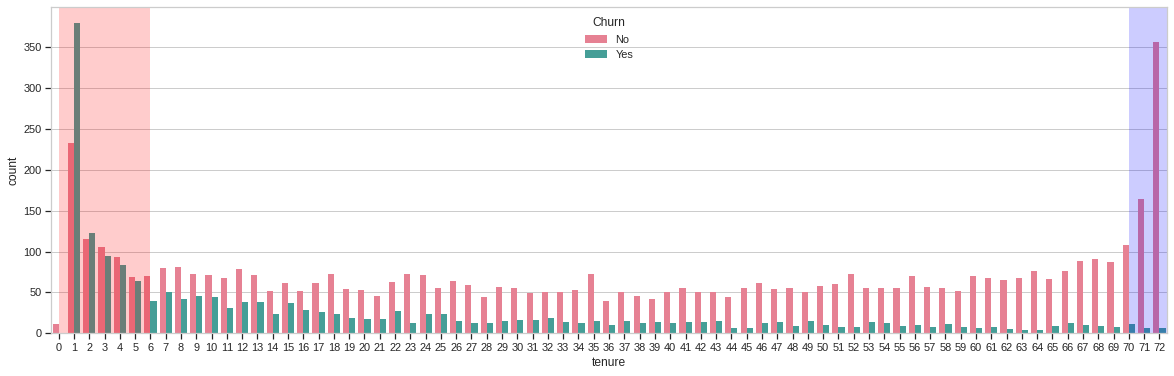

In [31]:
import matplotlib.patches as patches

sns.set_context('notebook')
fig, ax = plt.subplots(figsize =(20,6))
ax = sns.countplot(data['tenure'], hue = data['Churn'],palette='husl')

ax.add_patch(patches.Rectangle(
        (0, 0),
        6,
        400,
        #edgecolor = 'red',
        facecolor = 'red',
        #linewidth = 10,
        fill=True,
        alpha = 0.2
 )
)
ax.add_patch(patches.Rectangle(
        (70, 0),
        3,
       400,
        #edgecolor = 'blue',
        facecolor = 'blue',
        #linewidth = 10,
        fill=True,
        alpha = 0.2
 )
)
# 윤곽선이 필요없을때 
#ax.axvspan(15, 20, facecolor='blue',alpha = 0.2)

한달 계약(약정)의 경우 이탈율이 매우 높은것을 알 수 있으며, 5개월 이하의 고객들 까지는 50명이상의 이탈을 보여준다.

In [ ]:
print("5개월 보다 적게 머문 고객들중 이탈고객의 수: ",\
      data.loc[(data['tenure']<=5) & \
               (data['Churn']=='Yes')]['tenure'].value_counts().sum(),"명")

print("5개월 부터 72개월까지 오래 머문 고객들중 이탈고객의 수: ",\
      data.loc[(data['tenure']>5) & \
               (data['Churn']=='Yes')]['tenure'].value_counts().sum(),"명")

5개월 보다 적게 머문 고객들중 이탈고객의 수:  744 명
5개월 부터 72개월까지 오래 머문 고객들중 이탈고객의 수:  1125 명


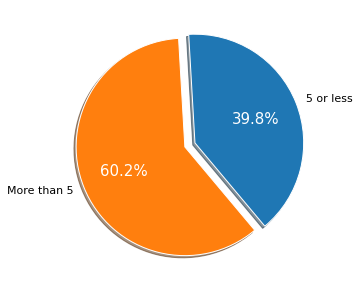

In [ ]:
# 시각화

# 기본옵션 설정
plt.figure(figsize= (12,5))
sns.set_style('whitegrid')
sns.set_context('notebook')


# 파이차트 데이터 사이즈 
size1 = data.loc[(data['tenure']<=5) & (data['Churn']=='Yes')]['tenure'].value_counts().sum()
size2 = data.loc[(data['tenure']>5) & (data['Churn']=='Yes')]['tenure'].value_counts().sum()
sizes = [size1, size2]

# 라벨 설정
labels = ["5 or less","More than 5"]

# 차트 그리기
patches, texts, autotexts = plt.pie(sizes,
                                   labels = labels,
                                   autopct = "%1.1f%%",
                                   shadow = True,
                                   explode = (0,0.1),
                                   startangle = 310)

# text옵션 설정
for t in texts:
    t.set_fontsize(11)
    t.set_color("black")
    
# autotexts옵션 설정
for at in autotexts:
    at.set_fontsize(15)
    at.set_color('white')
    
plt.show()

전체 이탈고객의 무려 약40%정도가 5개월이하의 계약에서 차지한다는것을 알게되었다.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


고객 이탈여부를 나타내는 Churn컬럼 역시 미리 변환시켜준다.

In [ ]:
# 인코딩
Churn_mapping = {'No' : 0, 'Yes' : 1}
data['Churn'] = data['Churn'].map(Churn_mapping)

너무 많은 데이터를 가지고 있어서 우서 5개의 카테고리로 묶어준다.

In [ ]:
data['tenure'] = pd.cut(data['tenure'],5)
data['tenure'].unique()

[(-0.072, 14.4], (28.8, 43.2], (43.2, 57.6], (14.4, 28.8], (57.6, 72.0]]
Categories (5, interval[float64]): [(-0.072, 14.4] < (14.4, 28.8] < (28.8, 43.2] < (43.2, 57.6] <
                                    (57.6, 72.0]]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['tenure'] = le.fit_transform(data['tenure'])

In [ ]:
## 5개월까지 한개의 카테고리로 묶고(데이터의 크기가 큰 범위), 나머지를 4개의 범위로 묶어주는방법 (이 방법과 위의 5개로 그냥 나누어준것중에 어떤것이 더 높을까?? 개인적인 생각으로는 전자다)
#data.loc[data['tenure']<=5,'tenure'] = 0
#data.loc[(data['tenure']>5) &  (data['tenure']<=22),'tenure'] = 1
#data.loc[(data['tenure']>22) &  (data['tenure']<=39),'tenure'] = 2
#data.loc[(data['tenure']>39) &  (data['tenure']<=56),'tenure'] = 3
#data.loc[(data['tenure']>56) &  (data['tenure']<=72),'tenure'] = 4
#data['tenure']

In [ ]:
pd.crosstab(data['tenure'], data['Churn'],margins=True)

Churn,0,1,All
tenure,,,
0,1272,1099,2371
1,831,295,1126
2,774,215,989
3,805,142,947
4,1492,118,1610
All,5174,1869,7043


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='tenure', ylabel='count'>

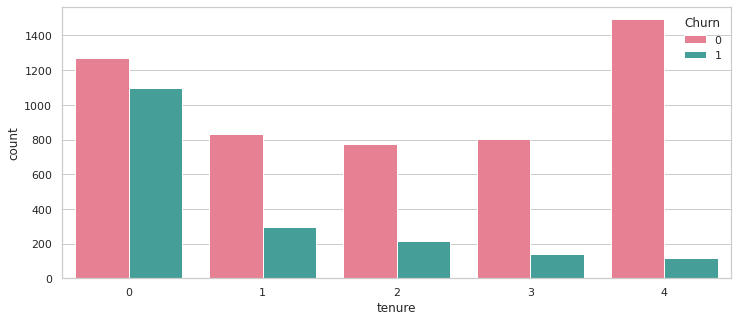

In [ ]:
plt.figure(figsize = (12,5))
sns.set_context('notebook')

sns.countplot(data['tenure'], hue = data['Churn'],palette = 'husl')

장기간 이용할 수록 이탈하는 고객들이 줄어든다
- 인사이트 : **대략 5개월을 초과한 기간 만큼 고객을 유지시킨다면 이탈률을 크게 낮출 수 있으므로 초반 가입 고객들에게 오래유지할 수 있는 서비스를 기획하거나 5개월 넘게 이용한 고객의 특징을 살펴본후 대입해 본다.**

- 현재 최 장기간 이용 고객들이 상당히 많은 수치를 가지고 있는것으로 보아 현재 서비스가 잘 이루어 지고 있다는것을 알 수 있다. 하지만 좀 더 좋은 초반 서비스를 통해 초기 보유 고객의 니즈를 충족시켜 주어야할것 같다.

## 성별에 따른 이탈차이도 있을까?


In [ ]:
print("남자 고객수 :", data.loc[data['gender']=='Male']['gender'].count())
print("여자 고객수 :",data.loc[data['gender']=='Female']['gender'].count())

남자 고객수 : 3555
여자 고객수 : 3488


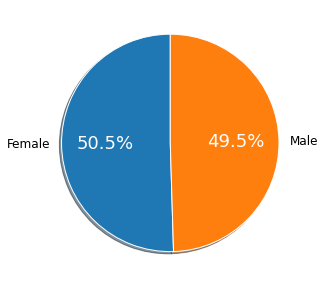

In [ ]:
# 남,여 성비 시각화
plt.figure(figsize = (12, 5))

patches, texts, autotexts = plt.pie([3555,3488],
                                    labels = ['Female', 'Male'],
                                    autopct='%1.1f%%',
                                    shadow = True,
                                    startangle = 90
                                    )
for t in texts:
  t.set_fontsize(12)
  t.set_color('black')

for a in autotexts:
  a.set_fontsize(18)
  a.set_color('white')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='gender', ylabel='count'>

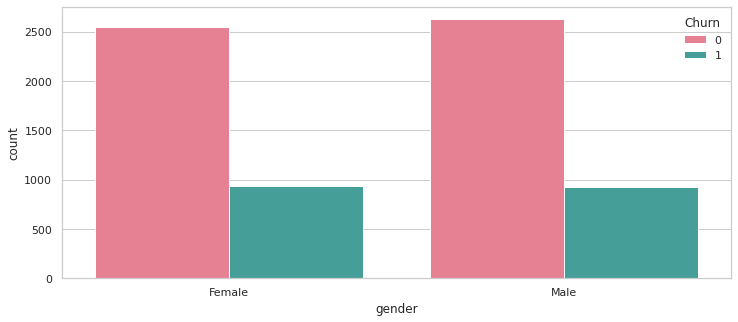

In [ ]:
# 성별에 따른 이탈 시각화

plt.figure(figsize = (12, 5))

sns.countplot(data['gender'], hue = data.Churn, palette = 'husl')

성별에 따른 인사이트는 얻기 힘들어 보인다.

## 고령자와 이탈에는 어떤 관계가 있을까?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

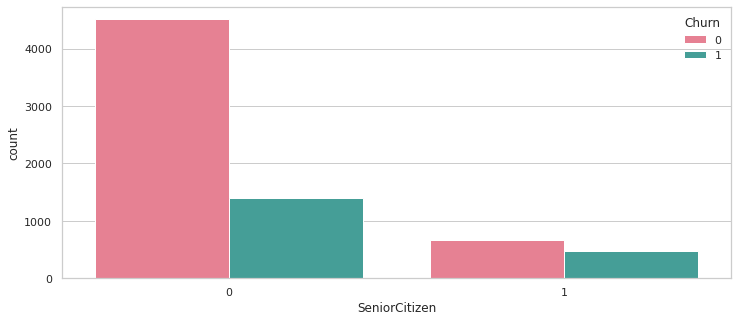

In [ ]:
# 첫번째 시각화
plt.figure(figsize = (12, 5))
sns.countplot(data["SeniorCitizen"], hue = data["Churn"], palette='husl')
# 비고령자 = 0 , 고령자 = 1

bar-chart로는 차지하는 비율이 다르기때문에 가시적이지 않다.

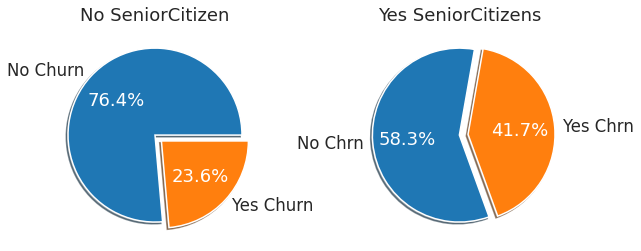

In [ ]:
# 두번째 시각화 

# 기본 세팅
fig, ax = plt.subplots(1,2,figsize = (10,4))
sns.set_context('talk')


# 젊은 고객
labels = ["No Churn", "Yes Churn"]

no_sizes = data.loc[(data['SeniorCitizen']==0) & (data['Churn']==0),\
                    'SeniorCitizen'].value_counts().sum()
yes_sizes = data.loc[(data['SeniorCitizen']==0) & (data['Churn']==1),\
                     'SeniorCitizen'].value_counts().sum()
sizes = [no_sizes, yes_sizes]


patches, texts, autotexts = ax[0].pie(sizes,
                                   labels = labels,
                                   autopct = "%1.1f%%",
                                   shadow = True,
                                   explode = (0, 0.1))

ax[0].set_title("No SeniorCitizen")

for t in autotexts:
    t.set_fontsize(18)
    t.set_color('white')
    
    
# 고령 고객
Senior_labels = ["No Chrn", "Yes Chrn"]

Senior_y_sizes = data.loc[(data['SeniorCitizen']==1) & (data['Churn']==0),\
                          'SeniorCitizen'].value_counts().sum()

Senior_n_sizes = data.loc[(data['SeniorCitizen']==1) & (data['Churn']==1),\
                          'SeniorCitizen'].value_counts().sum()

Senior_sizes = [Senior_y_sizes, Senior_n_sizes]

patches, texts, autotexts = ax[1].pie(Senior_sizes,
                                     labels = Senior_labels,
                                     autopct = "%1.1f%%",
                                     shadow = True,
                                     explode = (0, 0.1),
                                     startangle = 80)


ax[1].set_title("Yes SeniorCitizens")
    
for t in autotexts:
    t.set_fontsize(18)
    t.set_color('white')



plt.show();

- 인사이트 : **고령자분들의 이탈이 무려 40%이상이다. 이탈방지를 위해서는 싼가격으로 장기계약 이벤트등의 여러가지 기획이 필요하다.(세계적으로 점점 출산율이 줄어들기 때문에 향후에는 이것이 최 우선순위가 될 수 도 있을것 같다)**




In [ ]:
# 인코딩
sex_mapping = {'Female' : 0, 'Male' : 1}
data['gender'] = data['gender'].map(sex_mapping)

## 파트너 혹은 부양가족에 따른 이탈률을 알아보자


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Dependents and Churn correlation')

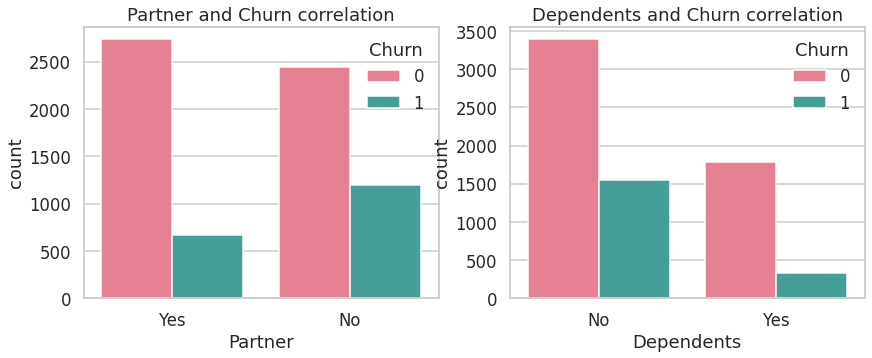

In [ ]:
# 시각화
fig, ax = plt.subplots(1, 2, figsize = (14,5))
sns.set_style('whitegrid')
sns.set_context('talk')


sns.countplot(data['Partner'], hue = data['Churn'], palette = 'husl',ax = ax[0])
ax[0].set_title('Partner and Churn correlation')

sns.countplot(data['Dependents'], hue =data['Churn'], palette = 'husl',ax = ax[1])
ax[1].set_title('Dependents and Churn correlation')

In [ ]:
answer_mapping = {'No' : 0, "Yes" : 1}
data['Partner'] = data['Partner'].map(answer_mapping)
data['Dependents'] = data['Dependents'].map(answer_mapping)

파트너, 혹은 부양가족이 없을때 이탈율이 더 높은것으로 보아 결합상품으로 인한 혜택을 받지 못함일 가능성이 있다. 이를 검토해 보고 친구 결합상품등의 다양한 상품을 기획해 볼 수 있다.

인터넷서비스/ 휴대폰서비스 구분하기
- 온라인 보안 여부, 온라인 백업 여부, 장치보호 여부, 기술지원 여부, StreamingTV, StreamingMovies 의 수치를 확인하면 No internet service 에서 똑같은 수치를 확인할 수 있다 
- 인사이트 : 인터넷 서비스에 (온라인 보안 여부, 온라인 백업 여부, 장치보호 여부, 기술지원 여부, StreamingTV, StreamingMovies) 이 포함된다/ 휴대폰서비스에 (Phoneservice,MultipleLines)이 포함된다.


In [ ]:
pd.crosstab(data['Partner'], data['StreamingTV'], normalize= True)

StreamingTV,No,No internet service,Yes
Partner,,,
0,0.236689,0.111884,0.168394
1,0.162289,0.104785,0.215959


In [ ]:
pd.crosstab(data['Partner'], data['StreamingMovies'], normalize= True)

StreamingMovies,No,No internet service,Yes
Partner,,,
0,0.233139,0.111884,0.171944
1,0.162289,0.104785,0.215959


In [ ]:
pd.crosstab(data['Partner'], data['OnlineBackup'], normalize= True)

OnlineBackup,No,No internet service,Yes
Partner,,,
0,0.260400,0.111884,0.144683
1,0.178049,0.104785,0.200199


In [ ]:
pd.crosstab(data['Partner'], data['OnlineSecurity'], normalize= True)

OnlineSecurity,No,No internet service,Yes
Partner,,,
0,0.289223,0.111884,0.115860
1,0.207440,0.104785,0.170808


In [ ]:
pd.crosstab(data['Partner'], data['TechSupport'], normalize= True)

TechSupport,No,No internet service,Yes
Partner,,,
0,0.282266,0.111884,0.122817
1,0.210848,0.104785,0.167400


In [ ]:
pd.crosstab(data['Partner'], data['DeviceProtection'], normalize= True)

DeviceProtection,No,No internet service,Yes
Partner,,,
0,0.263808,0.111884,0.141275
1,0.175635,0.104785,0.202613


In [ ]:
pd.crosstab(data['Partner'], data['InternetService'], normalize= True)

InternetService,DSL,Fiber optic,No
Partner,,,
0,0.177907,0.227176,0.111884
1,0.165838,0.212409,0.104785


폰 서비스
- 폰서비스에 MultipleLines 이 포함된다. 

In [ ]:
pd.crosstab(data['Partner'], data['PhoneService'], normalize= True)

PhoneService,No,Yes
Partner,,
0,0.052676,0.464291
1,0.044157,0.438875


In [ ]:
pd.crosstab(data['Partner'], data['MultipleLines'], normalize= True)

MultipleLines,No,No phone service,Yes
Partner,,,
0,0.281272,0.052676,0.183019
1,0.200057,0.044157,0.238819


인사이트 
- 인터넷 서비스를 사용하지않으면 다음 서비스( 온라인 보안 여부, 온라인 백업 여부, 장치보호 여부, 기술지원 여부, StreamingTV, StreamingMovies)를 같이 이용하지 않음을 보아 인터넷 서비스에 포함되는 내용인것으로 추측해 볼 수 있다. 
- MultipleLines 즉, 여러회선 여부는 폰서비스에 해당한다.

## 지불방법과 월청구비용에따른 이탈 정도

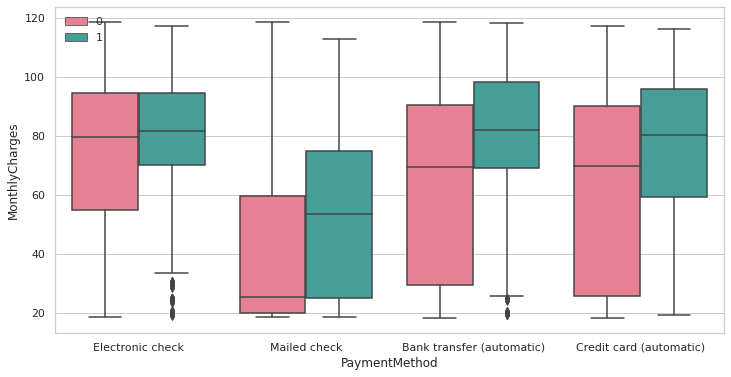

In [ ]:
sns.set_context('notebook')
plt.figure(figsize = (12,6))
sns.boxplot(x = data['PaymentMethod'], y = data['MonthlyCharges'], hue = data['Churn'],palette = 'husl')
ax = plt.gca()
ax.legend(loc = 'upper left')

- Mailed check 방법으로 청구방법을 사용하는 고객들의 월 청구금액이 가장낮다
- Mailed check 방법으로 청구하는 사람들이 이탈자와 그렇지 않은사람들의 차이가 가장크다

## 가입기간과 월간요금에 따른 이탈 확인

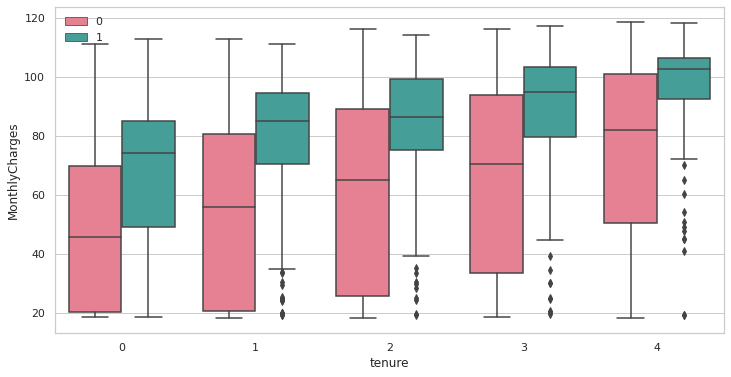

In [ ]:
sns.set_context('notebook')
plt.figure(figsize = (12,6))
sns.boxplot(x = data['tenure'], y = data['MonthlyCharges'], hue = data['Churn'],palette = 'husl')
ax= plt.gca()
ax.legend(loc = 'upper left')

- 기간이 짧은 구간에 계약을 해지하는사람이 많고, 해지하는사람들의 월 청구 비용은 전반적으로 높은것을 알 수 있다.

# 중간 인사이트 정리


- 단기계약일수록 이탈할 가능성이 높다 -> 최소 1년, 가능하다면 2년계약(약정)을 통해 장기간 약정으로 고객을 유치하는것이 가장 좋다.
- 5개월 이하로 이용한 유저들이 전체 이탈율의 40%를 차지하므로 그 기간동안 계속해서 사용할 수 있도록 서비스를 제공하는 방법도 좋은접근이라고 생각한다.
- 기간과 상관없이 비용이 높은사람들이 해지를 많이 하므로 일정 비용이상 지출에 근접한다면 알람 서비스를 만들어 조절할 수 있도록 개선한다.
- 성별에 따른 고객의 이탈의 차이는 보여주지 않고있다.
- 고령자 고객분들의 이탈률이 높으므로 고령자 분들을 위한 서비스를 기획해야할 필요가 있다(장기간 계약시 할인된 가격으로 이용 등), 향후 젊은 고객층이 고령자가 되었을시 이탈 방지를 위함
- 파트너 혹은 부양가족이 없는 고객들의 이탈률이 더 높은 것으로 보아 결합상품의 혜택을 받지 못할 가능성이 있으므로 직장동료, 혹은 친구,지인들과의 결합상품을 추가적으로 기획 해보는것도 좋은 방법이라고 생각한다.


# 전처리 완료하기

## 배우자, 부양가족, 각종서비스

중복되는 내용에 대해서 한번에 map함수를 사용하여 전처리 해준다.

 - No  = 0
 - Yes = 1
 - No phone service = 2
 - No internet service = 3

In [ ]:
# mapping dict생성
mapping = {'No': 0, 
           'Yes': 1,
           'No phone service': 2,
           'No internet service' : 3}

# 인코딩 컬럼 리스트 생성
columns_list = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',\
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', \
                'PaperlessBilling']

# map함수 사용
for i in columns_list:
  data[i] = data[i].map(mapping)
  data

In [ ]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,0,2,DSL,0,1,0,0,0,0,0,1,Electronic check,29.85,29.85,0
1,1,0,0,0,2,1,0,DSL,1,0,1,0,0,0,1,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,0,1,0,DSL,1,1,0,0,0,0,0,1,Mailed check,53.85,108.15,1
3,1,0,0,0,3,0,2,DSL,1,0,1,1,0,0,1,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,0,1,0,Fiber optic,0,0,0,0,0,0,0,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,1,1,DSL,1,0,1,1,1,1,1,1,Mailed check,84.80,1990.50,0
7039,0,0,1,1,4,1,1,Fiber optic,0,1,1,0,1,1,1,1,Credit card (automatic),103.20,7362.90,0
7040,0,0,1,1,0,0,2,DSL,1,0,0,0,0,0,0,1,Electronic check,29.60,346.45,0
7041,1,1,1,0,0,1,1,Fiber optic,0,0,0,0,0,0,0,1,Mailed check,74.40,306.60,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


## Tenure

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='tenure'>

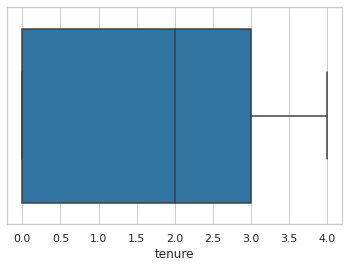

In [ ]:
# 이상치 확인
sns.boxplot(data['tenure'])

In [ ]:
data['tenure']

0       0
1       2
2       0
3       3
4       0
       ..
7038    1
7039    4
7040    0
7041    0
7042    4
Name: tenure, Length: 7043, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data['tenure'])
data['tenure'] = le.transform(data['tenure'])
data['tenure']

0       0
1       2
2       0
3       3
4       0
       ..
7038    1
7039    4
7040    0
7041    0
7042    4
Name: tenure, Length: 7043, dtype: int64

## InternetService 

InternetService : 인터넷 서비스(인터넷 서비스 제공없체: DSL, 광섬유, 아니요)

In [ ]:
IS_mapping = {'DSL' : 0,'Fiber optic' : 1, 'No' : 2 }
data['InternetService']= data['InternetService'].map(IS_mapping)
data['InternetService'].tail(50)

6993    1
6994    2
6995    0
6996    0
6997    1
6998    1
6999    0
7000    2
7001    0
7002    1
7003    0
7004    1
7005    2
7006    1
7007    0
7008    1
7009    1
7010    1
7011    0
7012    0
7013    1
7014    1
7015    1
7016    0
7017    2
7018    1
7019    2
7020    2
7021    0
7022    1
7023    1
7024    1
7025    1
7026    0
7027    0
7028    0
7029    0
7030    2
7031    0
7032    1
7033    1
7034    1
7035    1
7036    0
7037    2
7038    0
7039    1
7040    0
7041    1
7042    1
Name: InternetService, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='InternetService'>

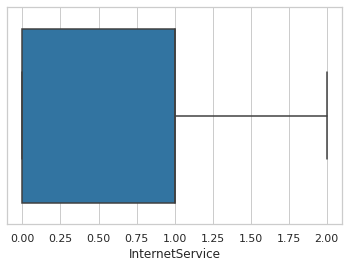

In [ ]:
# 이상치 확인
sns.boxplot(data['InternetService'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


## PaymentMethod

In [ ]:
data['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [ ]:
# mapping

P_mapping = {'Electronic check' : 0, 'Mailed check' : 1,  'Bank transfer (automatic)' : 2,  'Credit card (automatic)' : 3}
data['PaymentMethod'] =data['PaymentMethod'].map(P_mapping).astype(int)
data['PaymentMethod']

0       0
1       1
2       1
3       2
4       0
       ..
7038    1
7039    3
7040    0
7041    1
7042    2
Name: PaymentMethod, Length: 7043, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='PaymentMethod'>

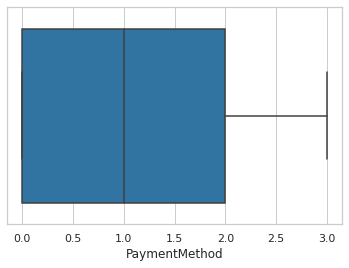

In [ ]:
# 이상치 확인
sns.boxplot(data['PaymentMethod'])

## MonthlyCharges

In [ ]:
data['MonthlyCharges']

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7043, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='MonthlyCharges'>

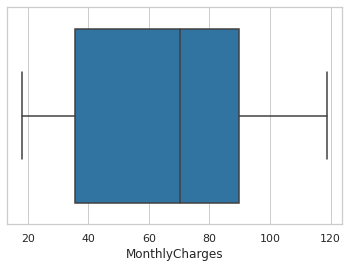

In [ ]:
sns.boxplot(data['MonthlyCharges'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


## TotalCharges

In [ ]:
data['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [ ]:
data.loc[data['TotalCharges']==' ','TotalCharges']

Series([], Name: TotalCharges, dtype: float64)

In [ ]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'].replace(' ',''))
data['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [ ]:
# 결측값 제거
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  


<AxesSubplot:xlabel='TotalCharges'>

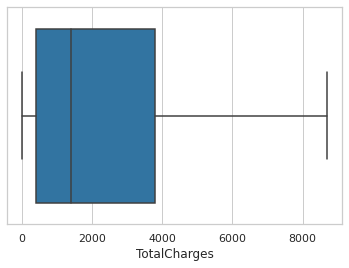

In [ ]:
# 이상치 여부 확인
sns.boxplot(x = data['TotalCharges']) 

## 정규화(Normalize)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

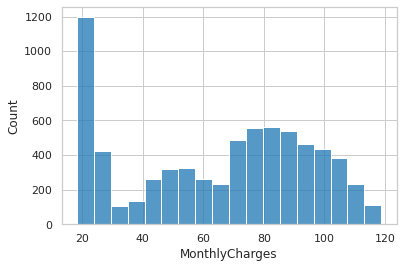

In [ ]:
sns.histplot(data['MonthlyCharges'])

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

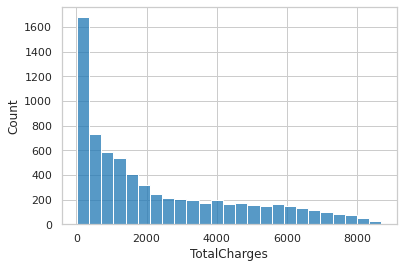

In [ ]:
sns.histplot(data['TotalCharges'])

In [ ]:
def z_score_normalize(lst):
    normalized = []
    for value in lst:
        normalized_num = (value - np.mean(lst)) / np.std(lst)
        normalized.append(normalized_num)
    return normalized

data['MonthlyCharges']   = z_score_normalize(data['MonthlyCharges'])
data['TotalCharges'] = z_score_normalize(data['TotalCharges'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,0,2,0,0,1,0,0,0,0,0,1,0,-1.161694,-0.994194,0
1,1,0,0,0,2,1,0,0,1,0,1,0,0,0,1,0,1,-0.260878,-0.173740,0
2,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,1,-0.363923,-0.959649,1
3,1,0,0,0,3,0,2,0,1,0,1,1,0,0,1,0,2,-0.747850,-0.195248,0
4,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0.196178,-0.940457,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,0.664868,-0.129180,0
7039,0,0,1,1,4,1,1,1,0,1,1,0,1,1,1,1,3,1.276493,2.241056,0
7040,0,0,1,1,0,0,2,0,1,0,0,0,0,0,0,1,0,-1.170004,-0.854514,0
7041,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0.319168,-0.872095,1


In [ ]:
# 상관관계 정도가 강한 인자 순서 나열
pd.DataFrame(abs(data.corr()['Churn']).sort_values(ascending = False))

,Churn
Churn,1.000000
Contract,0.396150
tenure,0.340024
OnlineSecurity,0.307644
TechSupport,0.305685
OnlineBackup,0.280405
DeviceProtection,0.273575
PaymentMethod,0.262918
StreamingMovies,0.224046
StreamingTV,0.222682


In [ ]:
# 양의 상관관계, 음의 상관관계 구별
pd.DataFrame(data.corr()['Churn'].sort_values(ascending = False))

,Churn
Churn,1.000000
MonthlyCharges,0.192858
PaperlessBilling,0.191454
SeniorCitizen,0.150541
MultipleLines,0.019609
PhoneService,0.011691
gender,-0.008545
InternetService,-0.047097
Partner,-0.149982
Dependents,-0.163128


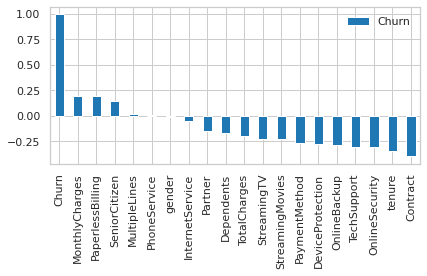

In [ ]:
# 상관관계 시각화
pd.DataFrame(data.corr()['Churn'].sort_values(ascending = False)).plot(kind="bar")
plt.tight_layout()

# 최종 EDA결과

- 단기계약일수록 이탈할 가능성이 높다 -> 최소 1년, 가능하다면 2년계약(약정)을 통해 장기간 약정으로 고객을 유치하는것이 가장 좋다.
- 5개월 이하로 이용한 유저들이 전체 이탈율의 40%를 차지하므로 그 기간동안 계속해서 사용할 수 있도록 서비스를 제공하는 방법도 좋은접근이라고 생각한다.
- 기간과 상관없이 비용이 높은사람들이 해지를 많이 하므로 일정 비용이상 지출에 근접한다면 알람 서비스를 만들어 조절할 수 있도록 개선한다.
- 성별에 따른 고객의 이탈의 차이는 보여주지 않고있다.
- 고령자 고객분들의 이탈률이 높으므로 고령자 분들을 위한 서비스를 기획해야할 필요가 있다(장기간 계약시 할인된 가격으로 이용 등), 향후 젊은 고객층이 고령자가 되었을시 이탈 방지를 위함
- 파트너 혹은 부양가족이 없는 고객들의 이탈률이 더 높은 것으로 보아 결합상품의 혜택을 받지 못할 가능성이 있으므로 직장동료, 혹은 친구,지인들과의 결합상품을 추가적으로 기획 해보는것도 좋은 방법이라고 생각한다.
- 폰서비스로 인해 높은 요금이 나오는 사람들또한 이탈할 확률이 적지 않으므로 계속해서 높은 요금을 사용하는 고객들에게 매년 1번~2번의 요금 할인 서비스 등의 크지않은 이벤트가 있으면 좋을것 같다.

# 이탈방지를 위한 예측 모델 만들기

고객관리와 같은 이론적내용 및 이커머스 데이터분석에 필요한 기법들을 학습후 전처리 점검하고 모델 만들기